# kNN with Z-Score on Movielens Dataset


## Preparation

In [2]:
%pip install -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [1]:
import sys, os
sys.path.append(os.path.abspath("../"))

import pandas as pd
import matplotlib.pyplot as plt

from core.utils import load_algo, load_cv, load_gscv, CV_FOLDS
from api.model import recommend_top_k

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

## Model Tuning

### User-based Similarities

In [3]:
%run ../core/gs_knn_zscore_msd.py

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    7.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   32.0s finished


In [19]:
gs_msd = load_gscv("gs_knn_zscore_msd")

gs_df = pd.DataFrame(gs_msd.cv_results)

abbr_gs_df = gs_df.drop(columns=["mean_fit_time", "std_fit_time", "mean_test_time", "std_test_time", "params", "param_sim_options"])

abbr_gs_df.sort_values(by="rank_test_rmse", ascending=True, inplace=False)[:20]

,split0_test_rmse,split1_test_rmse,split2_test_rmse,split3_test_rmse,split4_test_rmse,split5_test_rmse,split6_test_rmse,split7_test_rmse,split8_test_rmse,split9_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,param_k
9,0.888198,0.910515,0.888493,0.876939,0.896346,0.872470,0.898382,0.898142,0.891072,0.883170,0.890373,0.010618,1,39
8,0.888150,0.910608,0.888559,0.877209,0.896296,0.872606,0.898404,0.898094,0.890985,0.883050,0.890396,0.010582,2,38
7,0.888137,0.910746,0.888599,0.877256,0.896348,0.872680,0.898488,0.898242,0.891103,0.883110,0.890471,0.010607,3,37
6,0.888373,0.910565,0.888561,0.877456,0.896268,0.872929,0.898683,0.898197,0.890960,0.883070,0.890506,0.010510,4,36
5,0.888229,0.910533,0.888807,0.877390,0.896025,0.872976,0.898766,0.898339,0.891059,0.883121,0.890525,0.010504,5,35
4,0.888197,0.910649,0.889146,0.876993,0.896017,0.873316,0.898635,0.898350,0.891105,0.883167,0.890557,0.010503,6,34
3,0.888347,0.910829,0.889117,0.876750,0.896012,0.873541,0.898905,0.898580,0.891024,0.883078,0.890618,0.010573,7,33
2,0.888484,0.910766,0.889202,0.876702,0.896208,0.873911,0.898835,0.898702,0.891039,0.883138,0.890699,0.010514,8,32
1,0.888510,0.910840,0.889208,0.876614,0.896523,0.874288,0.898747,0.898729,0.891056,0.883350,0.890787,0.010477,9,31
0,0.888261,0.910718,0.889240,0.876722,0.896643,0.874378,0.898722,0.898900,0.891280,0.883499,0.890836,0.010438,10,30


In [4]:
%run ../core/gs_knn_zscore_cosine.py

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    8.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   36.8s finished


In [20]:
gs_cosine = load_gscv("gs_knn_zscore_cosine")

gs_df = pd.DataFrame(gs_cosine.cv_results)

abbr_gs_df = gs_df.drop(columns=["mean_fit_time", "std_fit_time", "mean_test_time", "std_test_time", "params", "param_sim_options"])

abbr_gs_df.sort_values(by="rank_test_rmse", ascending=True, inplace=False)[:20]

,split0_test_rmse,split1_test_rmse,split2_test_rmse,split3_test_rmse,split4_test_rmse,split5_test_rmse,split6_test_rmse,split7_test_rmse,split8_test_rmse,split9_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,param_k
5,0.891396,0.912756,0.891354,0.878785,0.897887,0.876716,0.902003,0.900081,0.891616,0.885765,0.892836,0.010353,1,35
9,0.891597,0.912936,0.891430,0.878954,0.897673,0.875830,0.902760,0.900082,0.891634,0.885562,0.892846,0.010574,2,39
6,0.891377,0.912719,0.891659,0.878760,0.897993,0.876491,0.902450,0.899887,0.891393,0.886001,0.892873,0.010400,3,36
7,0.891521,0.912812,0.891591,0.878846,0.897835,0.876599,0.902661,0.900066,0.891535,0.885730,0.892920,0.010429,4,37
8,0.891468,0.912891,0.891399,0.879196,0.897710,0.876255,0.902775,0.899997,0.891877,0.885779,0.892935,0.010448,5,38
4,0.891789,0.913149,0.891522,0.878939,0.897993,0.876713,0.901955,0.900416,0.892008,0.885940,0.893043,0.010409,6,34
3,0.891485,0.913217,0.891739,0.879047,0.898200,0.877081,0.901716,0.900497,0.892143,0.885894,0.893102,0.010349,7,33
2,0.891620,0.913069,0.891654,0.879129,0.898548,0.876948,0.901907,0.900730,0.892212,0.885985,0.893180,0.010373,8,32
1,0.891850,0.913199,0.891700,0.879076,0.898420,0.877124,0.901933,0.900862,0.892229,0.885838,0.893223,0.010389,9,31
0,0.892203,0.913172,0.891893,0.878949,0.898357,0.877267,0.901850,0.901233,0.892414,0.886058,0.893340,0.010373,10,30


In [5]:
%run ../core/gs_knn_zscore_pearson.py

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   10.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   47.5s finished


In [21]:
gs_pearson = load_gscv("gs_knn_zscore_pearson")

gs_df = pd.DataFrame(gs_pearson.cv_results)

abbr_gs_df = gs_df.drop(columns=["mean_fit_time", "std_fit_time", "mean_test_time", "std_test_time", "params", "param_sim_options"])

abbr_gs_df.sort_values(by="rank_test_rmse", ascending=True, inplace=False)[:20]

,split0_test_rmse,split1_test_rmse,split2_test_rmse,split3_test_rmse,split4_test_rmse,split5_test_rmse,split6_test_rmse,split7_test_rmse,split8_test_rmse,split9_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,param_k
8,0.883615,0.904667,0.885107,0.869884,0.890131,0.869478,0.894881,0.893874,0.885506,0.875433,0.885258,0.010733,1,38
9,0.883661,0.904635,0.884996,0.869925,0.890103,0.869544,0.894999,0.893851,0.885534,0.875341,0.885259,0.010727,2,39
6,0.883422,0.904490,0.884978,0.870043,0.890215,0.869559,0.894799,0.893960,0.885811,0.875338,0.885261,0.010683,3,36
7,0.883482,0.904495,0.885159,0.869963,0.890229,0.869516,0.894833,0.893985,0.885612,0.875381,0.885265,0.010701,4,37
4,0.883450,0.904479,0.885100,0.870100,0.890061,0.869549,0.895071,0.893889,0.885923,0.875312,0.885293,0.010689,5,34
5,0.883479,0.904423,0.885041,0.870092,0.890141,0.869662,0.894872,0.893972,0.885943,0.875318,0.885294,0.010655,6,35
3,0.883323,0.904531,0.884966,0.870188,0.889948,0.869562,0.895028,0.894057,0.886022,0.875332,0.885296,0.010690,7,33
2,0.883479,0.904487,0.884923,0.870259,0.890142,0.869644,0.895045,0.893995,0.886170,0.875339,0.885348,0.010663,8,32
1,0.883542,0.904485,0.885179,0.870165,0.890168,0.869767,0.895254,0.894090,0.886196,0.875439,0.885429,0.010675,9,31
0,0.883641,0.904582,0.885402,0.870100,0.890155,0.869726,0.895404,0.894142,0.886204,0.875321,0.885468,0.010734,10,30


### Item-based Similarities

In [13]:
%run ../core/gs_knn_zscore_msd_item.py

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  4.2min finished


In [22]:
gs_msd_item = load_gscv("gs_knn_zscore_msd_item")

gs_df = pd.DataFrame(gs_msd_item.cv_results)

abbr_gs_df = gs_df.drop(columns=["mean_fit_time", "std_fit_time", "mean_test_time", "std_test_time", "params", "param_sim_options"])

abbr_gs_df.sort_values(by="rank_test_rmse", ascending=True, inplace=False)[:20]

,split0_test_rmse,split1_test_rmse,split2_test_rmse,split3_test_rmse,split4_test_rmse,split5_test_rmse,split6_test_rmse,split7_test_rmse,split8_test_rmse,split9_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,param_k
9,0.890150,0.913132,0.892041,0.883378,0.901121,0.880074,0.904582,0.895190,0.898109,0.886513,0.894429,0.009626,1,39
8,0.890688,0.913708,0.892319,0.883465,0.901557,0.880193,0.904862,0.895771,0.898694,0.886480,0.894774,0.009771,2,38
7,0.890884,0.913951,0.892514,0.883710,0.901745,0.880245,0.904895,0.896239,0.898892,0.886830,0.894990,0.009769,3,37
6,0.890812,0.914375,0.892947,0.884123,0.902349,0.880696,0.905402,0.896681,0.899202,0.887006,0.895359,0.009825,4,36
5,0.891168,0.914859,0.893580,0.884542,0.903038,0.880882,0.905828,0.896884,0.899646,0.887447,0.895787,0.009887,5,35
4,0.891309,0.915024,0.893849,0.885065,0.903766,0.881348,0.906304,0.897502,0.899699,0.887729,0.896160,0.009866,6,34
3,0.892022,0.915054,0.894085,0.885511,0.904685,0.881428,0.906851,0.897902,0.900290,0.887971,0.896580,0.009906,7,33
2,0.892553,0.915681,0.894421,0.885895,0.905141,0.881828,0.907187,0.898481,0.900678,0.888559,0.897042,0.009929,8,32
1,0.893279,0.916171,0.895156,0.886596,0.905697,0.882402,0.908017,0.898484,0.901230,0.889075,0.897611,0.009911,9,31
0,0.893839,0.916782,0.895466,0.887144,0.906392,0.883074,0.908389,0.899373,0.901640,0.889500,0.898160,0.009913,10,30


In [15]:
%run ../core/gs_knn_zscore_cosine_item.py

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  8.2min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed: 29.2min finished


In [16]:
gs_cosine_item = load_gscv("gs_knn_zscore_cosine_item")

gs_df = pd.DataFrame(gs_cosine_item.cv_results)

abbr_gs_df = gs_df.drop(columns=["mean_fit_time", "std_fit_time", "mean_test_time", "std_test_time", "params", "param_sim_options"])

abbr_gs_df.sort_values(by="rank_test_rmse", ascending=True, inplace=False)[:20]

,split0_test_rmse,split1_test_rmse,split2_test_rmse,split3_test_rmse,split4_test_rmse,split5_test_rmse,split6_test_rmse,split7_test_rmse,split8_test_rmse,split9_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,param_k
9,0.901669,0.922693,0.903503,0.890497,0.912648,0.891185,0.916698,0.905660,0.911416,0.898609,0.905458,0.010016,1,39
8,0.902137,0.923003,0.903964,0.890777,0.912656,0.891280,0.916873,0.905924,0.911815,0.899437,0.905787,0.009978,2,38
7,0.902527,0.922746,0.904466,0.891449,0.912999,0.891545,0.917031,0.906281,0.912044,0.899554,0.906064,0.009820,3,37
6,0.903033,0.923425,0.905116,0.891394,0.912876,0.892262,0.917066,0.906634,0.911722,0.899760,0.906329,0.009778,4,36
5,0.903079,0.923833,0.905671,0.891472,0.912907,0.892951,0.917398,0.907332,0.912133,0.899915,0.906669,0.009785,5,35
4,0.903411,0.924068,0.905933,0.891808,0.913441,0.892458,0.917832,0.907316,0.912872,0.900369,0.906951,0.009924,6,34
3,0.903767,0.924207,0.906498,0.892045,0.914169,0.893117,0.918276,0.907773,0.913513,0.900673,0.907404,0.009915,7,33
2,0.904122,0.924595,0.907020,0.892347,0.914633,0.893920,0.919091,0.908705,0.913990,0.901052,0.907947,0.009931,8,32
1,0.904599,0.925154,0.907727,0.892535,0.915375,0.894846,0.919518,0.909169,0.914798,0.901693,0.908541,0.009948,9,31
0,0.905304,0.925343,0.908506,0.892815,0.915933,0.895287,0.919659,0.909588,0.914992,0.902381,0.908981,0.009863,10,30


In [17]:
%run ../core/gs_knn_zscore_pearson_item.py

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed: 19.3min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed: 68.0min finished


In [18]:
gs_pearson_item = load_gscv("gs_knn_zscore_pearson_item")

gs_df = pd.DataFrame(gs_pearson_item.cv_results)

abbr_gs_df = gs_df.drop(columns=["mean_fit_time", "std_fit_time", "mean_test_time", "std_test_time", "params", "param_sim_options"])

abbr_gs_df.sort_values(by="rank_test_rmse", ascending=True, inplace=False)[:20]

,split0_test_rmse,split1_test_rmse,split2_test_rmse,split3_test_rmse,split4_test_rmse,split5_test_rmse,split6_test_rmse,split7_test_rmse,split8_test_rmse,split9_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,param_k
9,0.897106,0.916281,0.900473,0.886760,0.909545,0.886712,0.911006,0.902621,0.906020,0.891245,0.900777,0.009755,1,39
8,0.897688,0.916377,0.900647,0.886972,0.909914,0.887053,0.911485,0.902932,0.906476,0.891345,0.901089,0.009773,2,38
7,0.898165,0.916506,0.900990,0.887129,0.910173,0.887380,0.911871,0.903461,0.906355,0.891639,0.901367,0.009745,3,37
6,0.898343,0.916819,0.901421,0.887035,0.910462,0.887678,0.912151,0.903874,0.906630,0.891871,0.901629,0.009814,4,36
5,0.898868,0.917258,0.901590,0.887105,0.910871,0.888113,0.912654,0.904188,0.907224,0.892222,0.902009,0.009886,5,35
4,0.899175,0.917421,0.902081,0.887267,0.911128,0.888493,0.912705,0.904499,0.907606,0.892711,0.902309,0.009830,6,34
3,0.899553,0.917520,0.902720,0.887475,0.911500,0.888868,0.913279,0.904866,0.908155,0.893144,0.902708,0.009838,7,33
2,0.899978,0.917764,0.903292,0.887776,0.912111,0.889333,0.913884,0.905516,0.908698,0.893742,0.903209,0.009855,8,32
1,0.900353,0.917802,0.903635,0.888208,0.912714,0.889915,0.914669,0.906269,0.908944,0.894321,0.903683,0.009817,9,31
0,0.900734,0.918175,0.904242,0.888405,0.913278,0.890182,0.915090,0.906997,0.909196,0.894341,0.904064,0.009920,10,30


### Plotting k values

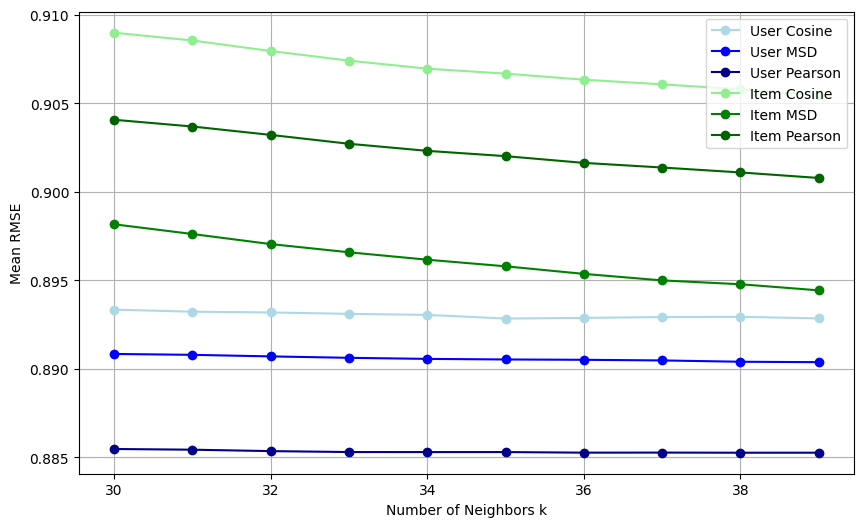

In [33]:
df_msd = pd.DataFrame(gs_msd.cv_results)[["param_k", "mean_test_rmse"]].sort_values(by="param_k")
df_cosine = pd.DataFrame(gs_cosine.cv_results)[["param_k", "mean_test_rmse"]].sort_values(by="param_k")
df_pearson = pd.DataFrame(gs_pearson.cv_results)[["param_k", "mean_test_rmse"]].sort_values(by="param_k")

df_msd_item = pd.DataFrame(gs_msd_item.cv_results)[["param_k", "mean_test_rmse"]].sort_values(by="param_k")
df_cosine_item = pd.DataFrame(gs_cosine_item.cv_results)[["param_k", "mean_test_rmse"]].sort_values(by="param_k")
df_pearson_item = pd.DataFrame(gs_pearson_item.cv_results)[["param_k", "mean_test_rmse"]].sort_values(by="param_k")

plt.figure(figsize=(10, 6))

plt.plot(df_cosine["param_k"], df_cosine["mean_test_rmse"], marker="o", linestyle="-", label="User Cosine", color="lightblue")
plt.plot(df_msd["param_k"], df_msd["mean_test_rmse"], marker="o", linestyle="-", label="User MSD", color="blue")
plt.plot(df_pearson["param_k"], df_pearson["mean_test_rmse"], marker="o", linestyle="-", label="User Pearson", color="darkblue")

plt.plot(df_cosine_item["param_k"], df_cosine_item["mean_test_rmse"], marker="o", linestyle="-", label="Item Cosine", color="lightgreen")
plt.plot(df_msd_item["param_k"], df_msd_item["mean_test_rmse"], marker="o", linestyle="-", label="Item MSD", color="green")
plt.plot(df_pearson_item["param_k"], df_pearson_item["mean_test_rmse"], marker="o", linestyle="-", label="Item Pearson", color="darkgreen")

plt.title('')
plt.xlabel('Number of Neighbors k')
plt.ylabel('Mean RMSE')
plt.grid(True)
plt.legend()
plt.show()

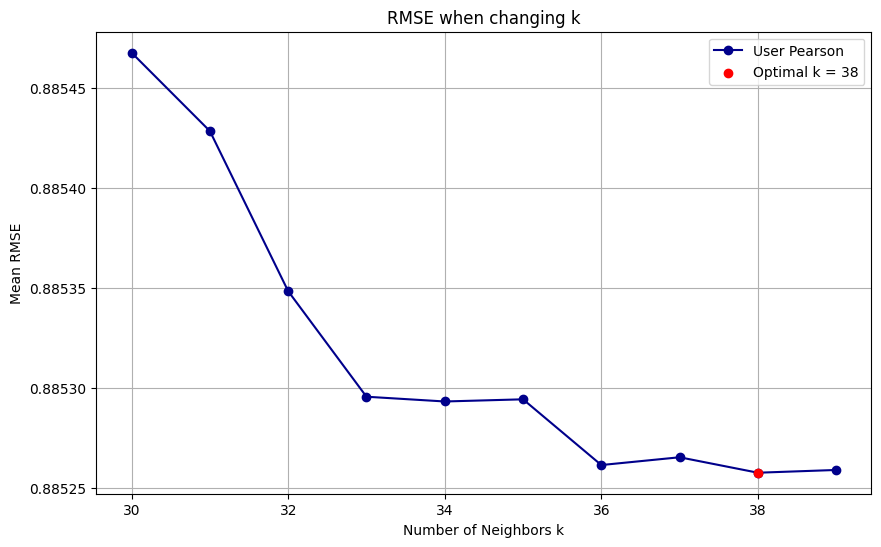

In [32]:
min_rmse_index = df_pearson["mean_test_rmse"].idxmin()
optimal_k = df_pearson.loc[min_rmse_index, "param_k"]
min_rmse = df_pearson.loc[min_rmse_index, "mean_test_rmse"]

plt.figure(figsize=(10, 6))

plt.plot(df_pearson["param_k"], df_pearson["mean_test_rmse"], marker="o", linestyle="-", label="User Pearson", color="darkblue")
plt.scatter(optimal_k, min_rmse, color='red', label=f'Optimal k = {optimal_k}', zorder=5)

plt.title('')
plt.xlabel('Number of Neighbors k')
plt.ylabel('Mean RMSE')
plt.grid(True)
plt.legend()
plt.show()

## Model Training

In [3]:
%run ../core/train_knn_zscore.py

Computing the pearson similarity matrix...
Done computing similarity matrix.


## Model Usage

In [4]:
predictions, algo = load_algo("knn_zscore_full")

In [36]:
uid = str(100)
iid = str(11)

algo.predict(uid, iid, r_ui=4.0)

Prediction(uid='100', iid='11', r_ui=4.0, est=4.190135080413547, details={'actual_k': 36, 'was_impossible': False})

In [37]:
uid = str(100)
iid = str(115)

algo.predict(uid, iid)

Prediction(uid='100', iid='115', r_ui=None, est=3.501556983616962, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [70]:
uid = str(100)
k = 20

top_20 = recommend_top_k(predictions, k=k)

pd.DataFrame(top_20[uid], index=(f"Top {n}" for n in range(1, k + 1)))

,movieId,est_r,title,genres,imdbId,tmdbId
Top 1,71899,5,Mary and Max (2009),Animation|Comedy|Drama,0978762,24238
Top 2,112421,5,Frank (2014),Comedy|Drama|Mystery,1605717,171372
Top 3,4846,5,Iron Monkey (Siu nin Wong Fei-hung ji: Tit Ma ...,Action|Comedy,0108148,12780
Top 4,168492,5,Call Me by Your Name (2017),Drama|Romance,5726616,398818
Top 5,158966,5,Captain Fantastic (2016),Drama,3553976,334533
Top 6,98491,5,Paperman (2012),Animation|Comedy|Romance,2388725,140420
Top 7,4380,5,"Princess and the Warrior, The (Krieger und die...",Drama|Romance,0203632,9301
Top 8,27523,5,My Sassy Girl (Yeopgijeogin geunyeo) (2001),Comedy|Romance,0293715,11178
Top 9,67618,5,Strictly Sexual (2008),Comedy|Drama|Romance,0494277,13808
Top 10,3266,5,Man Bites Dog (C'est arrivé près de chez vous)...,Comedy|Crime|Drama|Thriller,0103905,10086


## Model Testing

In [5]:
%run ../core/test_knn_zscore.py

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


In [7]:
cv_dict = load_cv("cv_knn_zscore")

cv_df = pd.DataFrame(cv_dict, index=(f"Fold {k}" for k in range(1, CV_FOLDS + 1)))

cv_df.loc["Mean"] = cv_df.mean(axis=0)
cv_df.loc["Stdev"] = cv_df.std(axis=0)

cv_df.drop(columns=[]).transpose()

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Fold 6,Fold 7,Fold 8,Fold 9,Fold 10,Mean,Stdev
test_rmse,0.883615,0.904667,0.885107,0.869884,0.890131,0.869478,0.894881,0.893874,0.885506,0.875433,0.885258,0.010733
test_mae,0.669162,0.684401,0.670548,0.658037,0.674957,0.654802,0.672243,0.668816,0.672999,0.660758,0.668672,0.008308
fit_time,1.066751,1.132581,1.280682,1.451285,1.542687,1.199257,1.432726,1.068115,0.972036,0.859165,1.200529,0.211914
test_time,1.066642,1.043174,1.033032,1.095210,0.892367,0.965304,0.766156,0.728122,0.595134,0.557784,0.874292,0.189552
test_prec,0.546081,0.537188,0.564227,0.551151,0.513213,0.547674,0.543749,0.523193,0.543143,0.542875,0.541249,0.013534
test_rec,0.431797,0.418299,0.424727,0.431849,0.399636,0.413106,0.414942,0.400758,0.423916,0.429476,0.418851,0.011202
test_f1,0.448598,0.440673,0.448690,0.452539,0.419201,0.435774,0.436951,0.421354,0.442252,0.448517,0.439455,0.010905
